<a id='0'> <h1>Table des matières

<a href='#1'> 1. Objectifs de l’analyse</a> <br>
<a href='#2'>2. Importation des librairies et datasets et description des variables</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#2.1'>2.1 Importation des librairies</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#2.2'>2.2 Importation et copie du dataset</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#2.3'>2.3 Importation et copie du dataset</a> <br>
<a href='#3'> 3. prétraitement</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.1'>3.1 .head </a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.2'>3.2  tail </a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.3'>3.3 sample</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.4'>3.4 info</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.5'>3.5  .nunique</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.6'>3.6  isna </a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.7'>3.7 duplicates</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.8'>3.8 zero</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.9'>3.9 describe</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#3.10'>3.10 target value count</a> <br>
<a href='#4'> 4. traitement</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#4.1'>4.1 stocker les colonnes numériques et catégorielles dans 2 variables</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#4.2'>4.2 valeurs aberrantes </a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#4.3'>4.3 Traitement des Nan</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#4.4'>4.4 duplicates</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#4.5'>4.5 zero</a> <br>
<a href='#5'> 5. Analyse statistique</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.1'>5.1  Analyse univariée</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.1.1'>5.1.1. sur l'ensemble des colonnes</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.1.2'>5.1.2. zoom sur les colonnes qui seraient à creuser (outliers) avec graphs interactifs</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.1.3'>5.1.3. écarts interquartiles</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.2'>5.2 Analyses bi-variées</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.2.1'>5.2.1. boxplots par colonne avec hue = diagnostic</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.2.2'>5.2.2. focus sur les colonnes pour lesquelles on ne voit pas la différence entre sain et patho</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.3'>5.3. Analyses multi variées</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.3.1'>5.3.1. Pairplots</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#5.3.2'>5.3.2. Heatmaps</a> <br>
<a href='#6'> 6. Conclusion de l'exploration des données</a> <br>

## <a id='1'>1. Objectifs de l'analyse <a>

<a href='#0'> Retour à la table des matières </a> <br>

## <a id='2'>2. Objectifs de l’analyse et description des variables <a>

### <a id='2.1'>2.1 Importation des librairies

In [3]:
# pip install scipy

In [4]:
from ydata_profiling import ProfileReport
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statannot import add_stat_annotation
from scipy.stats import ttest_ind

### <a id='2.2'>2.2 Importation et copie du dataset

In [5]:
url = 'https://raw.githubusercontent.com/MaskiVal/DataSets/main/heartDisease.csv'
df_heart_disease = pd.read_csv(url)
df_heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### <a id='2.3'>2.3 Description des variables

<a href='#0'> Retour à la table des matières </a> <br>

## <a id='3'>3. prétraitement <a>

### <a id='3.1'>3.1 .head

In [6]:
df_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### <a id='3.2'>3.2 tail

In [7]:
df_heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### <a id='3.3'>3.3 sample

In [8]:
df_heart_disease.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1


### <a id='3.4'>3.4 info

In [9]:
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### <a id='3.5'>3.5 .nunique

In [10]:
df_heart_disease.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### <a id='3.6'>3.6 isna

In [11]:
def count_isna(df):
    isna_df= df.isna().sum().to_frame()
    isna_df.reset_index(inplace = True)
    isna_df.rename(columns={'index':'column', 0: 'nb_isna'}, inplace = True)
    isna_df= isna_df.loc[(isna_df != 0).all(axis=1)]
    return isna_df

In [12]:
count_isna(df_heart_disease)

,column,nb_isna


### <a id='3.7'>3.7 duplicates

In [13]:
def find_duplicates(df):
    duplicates_mask = df.duplicated(keep=False)
    duplicates_df = df[duplicates_mask]
    return duplicates_df

In [14]:
find_duplicates(df_heart_disease)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### <a id='3.8'>3.8 zero

In [15]:
def count_iszero(df):
    df_iszero = pd.DataFrame(df[df == 0].count())
    df_iszero.rename(columns={0: 'nb_iszero'}, inplace = True)
    df_iszero = df_iszero.loc[~(df_iszero == 0).all(axis=1)]
    return df_iszero

In [16]:
count_iszero(df_heart_disease)

,nb_iszero
sex,96
cp,143
fbs,258
restecg,147
exang,204
oldpeak,99
slope,21
ca,175
thal,2
target,138


### <a id='3.9'>3.9 describe

In [17]:
df_heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### <a id='3.10'>3.10 target value count

In [18]:
df_heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<a href='#0'> Retour à la table des matières </a> <br>

## <a id='4'>4. traitement <a>

### <a id='4.1'>4.1 stocker les colonnes numériques et catégorielles dans 2 variables

In [19]:
# Définir un seuil pour le nombre de valeurs uniques pour distinguer entre catégorielles et continues
threshold_unique_values = 10  # Ajustez ce seuil en fonction de vos données

# Identifier les variables catégorielles (nombre de valeurs uniques inférieur au seuil)
categorical_vars = [col for col in df_heart_disease.columns if df_heart_disease[col].nunique() < threshold_unique_values]

# Identifier les variables numériques continues (nombre de valeurs uniques supérieur au seuil)
numeric_continuous_vars = [col for col in df_heart_disease.columns if col not in categorical_vars]

In [20]:
categorical_vars

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [21]:
numeric_continuous_vars

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### <a id='4.2'>4.2 valeurs aberrantes

In [46]:
# Fonction pour trouver les erreurs de saisies (tabulations et espaces)
def find_tabs_and_spaces(dataset):
    issues_found = []

    for index, row in dataset.iterrows():
        for column in dataset.columns:
            cell_value = row[column]
            if isinstance(cell_value, str):
                if '\t' in cell_value:
                    issues_found.append(f'Ligne {index}, Colonne {column}: Tabulation détectée : {cell_value}')
                if ' ' in cell_value:
                    issues_found.append(f'Ligne {index}, Colonne {column}: Espace en trop détecté : {cell_value}')

    return issues_found

# Résolution
def remplacement(df):
    columns = df.select_dtypes(include='object').columns
    for column in columns:
        df[column] = df[column].apply(lambda x: x.replace('\t', '') if (pd.notna(x) and isinstance(x, str) and '\t' in x) else x)
    return df

In [47]:
find_tabs_and_spaces(df_heart_disease)

[]

In [60]:
def detect_outliers(dataframe, numeric_continuous_vars, threshold=1.5):
    for col in numeric_continuous_vars:
        # Calcul de l'IQR
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Détection des outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        col_outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)][col]
        
        # Tri des outliers par ordre croissant
        sorted_outliers = col_outliers.sort_values()
        
        print(f"Variable: {col}")
        print(f"Number of Outliers: {len(sorted_outliers)}")
        print(f"Outliers: {sorted_outliers.values}\n{'='*30}\n")

detect_outliers(df_heart_disease, numeric_continuous_vars)

Variable: age
Number of Outliers: 0
Outliers: []

Variable: trestbps
Number of Outliers: 9
Outliers: [172 174 178 178 180 180 180 192 200]

Variable: chol
Number of Outliers: 5
Outliers: [394 407 409 417 564]

Variable: thalach
Number of Outliers: 1
Outliers: [71]

Variable: oldpeak
Number of Outliers: 5
Outliers: [4.2 4.2 4.4 5.6 6.2]



### <a id='4.3'>4.3 Traitement des Nan

In [25]:
# Pas concerné

### <a id='4.4'>4.4 duplicates

In [26]:
df_heart_disease.drop_duplicates(inplace = True)

### <a id='4.5'>4.5 zero

In [27]:
df_heart_disease["oldpeak"].value_counts()

0.0    98
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

<a href='#0'> Retour à la table des matières </a> <br>

## <a id='5'>5. Analyse statistique<a>

### <a id='5.1'>5.1 Analyse univariée

#### <a id='5.1.1'>5.1.1. sur l'ensemble des colonnes

In [28]:
def histo_moustaches_numerical(dataframe):
    num_df = dataframe.select_dtypes(include=np.number)
    for col in num_df:
        plt.figure(figsize = (5, 1))
        plt.subplot(1, 2, 1)
        sns.histplot(num_df, x= num_df[col], kde=True)
        # plt.title(col)
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=num_df[col])
        #plt.title(col)
        plt.show()

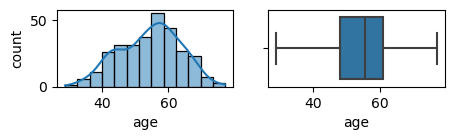

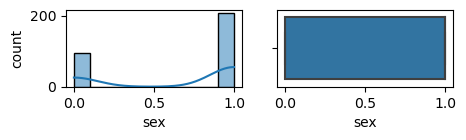

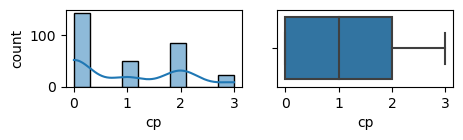

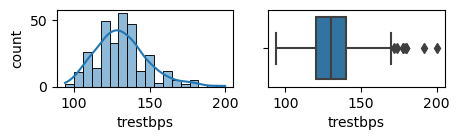

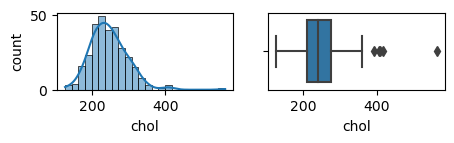

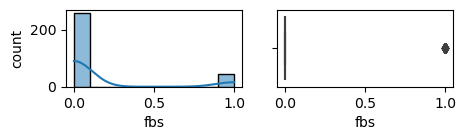

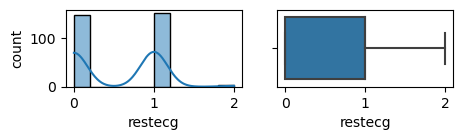

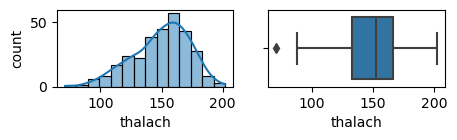

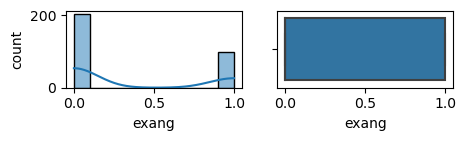

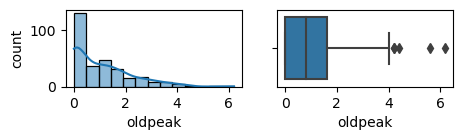

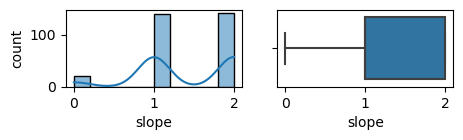

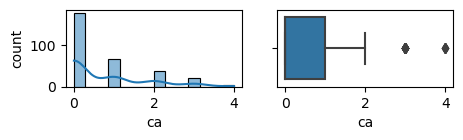

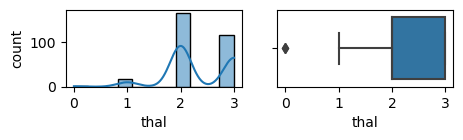

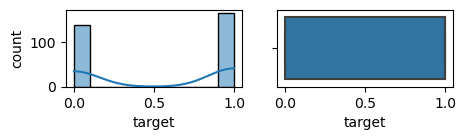

In [29]:
histo_moustaches_numerical(df_heart_disease)

#### <a id='5.1.2'>5.1.2. zoom sur les colonnes qui seraient à creuser (outliers) avec graphs interactifs

In [62]:
def histo_moustaches_numerical(dataframe):
    num_df = dataframe.select_dtypes(include=np.number)
    for col in num_df:
        fig = make_subplots(rows=1, cols=2,subplot_titles=(f'{col}', f'{col}'))

        fig.add_trace(go.Histogram(x= num_df[col],name= ""),
                      row=1, col=1)
        fig.update_layout(showlegend= False)
        fig.add_trace(go.Box(x=num_df[col],name= ""),
                      row=1, col=2)

        fig.update_layout(height=300, width=800)
        fig.show()

In [63]:
histo_moustaches_numerical(df_heart_disease)

#### <a id='5.1.3'>5.1.3. écarts interquartiles

In [32]:
# à utiliser avec les valeurs numériques uniquement: df[numeric_continuous_vars]

def calculate_iqr(dataframe):

    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    iqr_values = q3 - q1

    print(iqr_values)

In [53]:
calculate_iqr(df_heart_disease)

age         13.00
sex          1.00
cp           2.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64


### <a id='5.2'>5.2 Analyses bi-variées

#### <a id='5.2.1'>5.2.1. boxplots par colonne avec hue = diagnostic

In [34]:
def add_p_values(ax, data, group_col, value_col):
    # Récupérer les catégories uniques dans la colonne group_col
    groups = data[group_col].unique()
    # Paires de catégories pour lesquelles nous voulons calculer les valeurs p
    pairs = [(groups[i], groups[j]) for i in range(len(groups)) for j in range(i+1, len(groups))]
    # Calculer les valeurs p et les ajouter aux boîtes
    for pair in pairs:
        subset1 = data[data[group_col] == pair[0]][value_col]
        subset2 = data[data[group_col] == pair[1]][value_col]
        p_value = ttest_ind(subset1, subset2).pvalue
        # Positionner l'annotation au-dessus de la boîte
        ypos = max(subset1.max(), subset2.max()) + 0.1 * (max(subset1.max(), subset2.max()) - min(subset1.min(), subset2.min()))
        ax.text(pairs.index(pair) + 1, ypos, f'p = {p_value:.4f}', ha='center', va='center', fontsize=10, color='red')
        
def boxplot_for(dataframe, target):
    num_cols = dataframe.shape[1]
    num_rows = (num_cols - 1) // 4 + 1  # Calculer le nombre de lignes nécessaire pour afficher 4 boxplots par ligne
    plt.figure(figsize=(20, 4 * num_rows))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(num_rows, 4, i + 1)
        # Vérifier si la colonne est numérique
        if dataframe[column].dtype in ['int64', 'float64']:
            # Créer le boxplot
            ax = sns.boxplot(y=dataframe[column], x=dataframe[target])
            # Ajouter les valeurs p
            add_p_values(ax, dataframe, target, column)
            plt.title(column)
        else:
            # Si la colonne n'est pas numérique, afficher une boîte à moustaches sans les valeurs p
            sns.boxplot(y=dataframe[column], x=dataframe[target])
            plt.title(column)
    plt.tight_layout()
    plt.show()

C:\Users\Wilders\AppData\Local\Temp\ipykernel_12552\4075096951.py:10: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



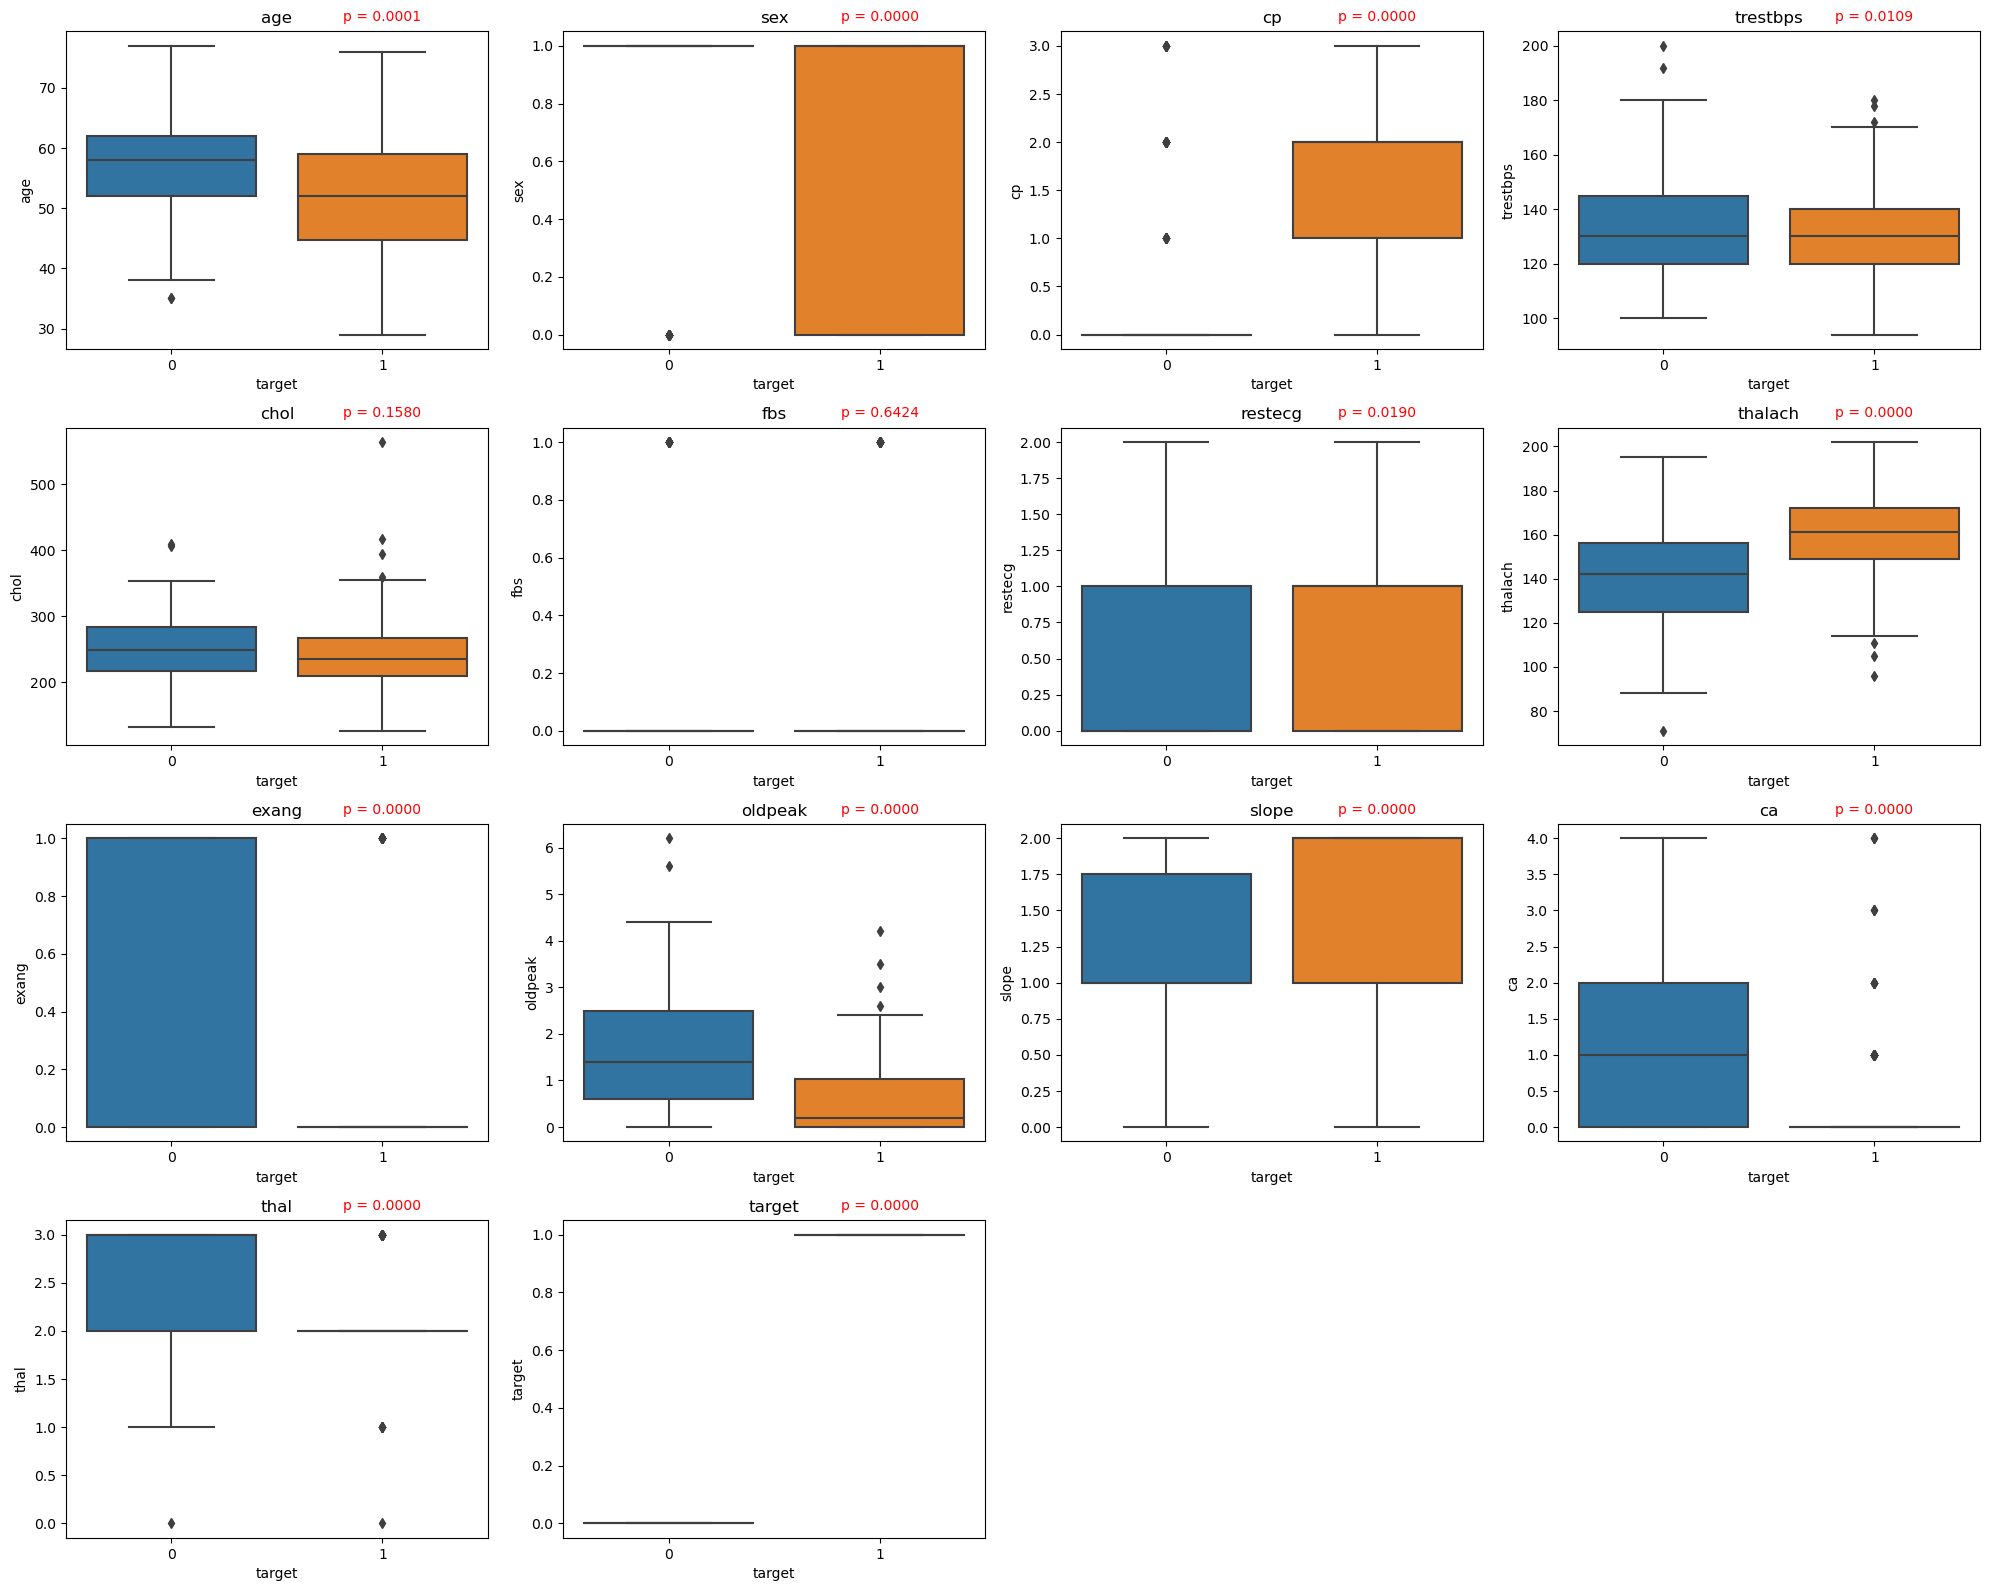

In [35]:
boxplot_for(df_heart_disease, "target")

#### <a id='5.2.2'>5.2.2. focus sur les colonnes pour lesquelles on ne voit pas la différence entre sain et patho

In [36]:
# CODE RETOUCHE POUR AVOIR LA DISTRIBUTION SUIVANT LES MALADES ET LES SAINS

def histo_numerical(dataframe, colonne_diagnostic, sain, malade):
    for col in dataframe.columns:
        plt.figure(figsize=(13, 3))

        # Cohorte complète
        plt.subplot(1, 3, 1)
        sns.histplot(data=dataframe, x=dataframe[col], kde=True)
        plt.ylabel('count')
        plt.xlabel(f'{col} - Cohorte complète')

        # Patients sains
        plt.subplot(1, 3, 2)
        sns.histplot(data=dataframe[dataframe[colonne_diagnostic] == sain], x=col, kde=True)
        plt.xlabel(f'{col} - Cohorte {sain}')

        # Patients malades
        plt.subplot(1, 3, 3)
        sns.histplot(data=dataframe[dataframe[colonne_diagnostic] == malade], x=col, kde=True)
        plt.xlabel(f'{col} - Cohorte {malade}')

        plt.show()

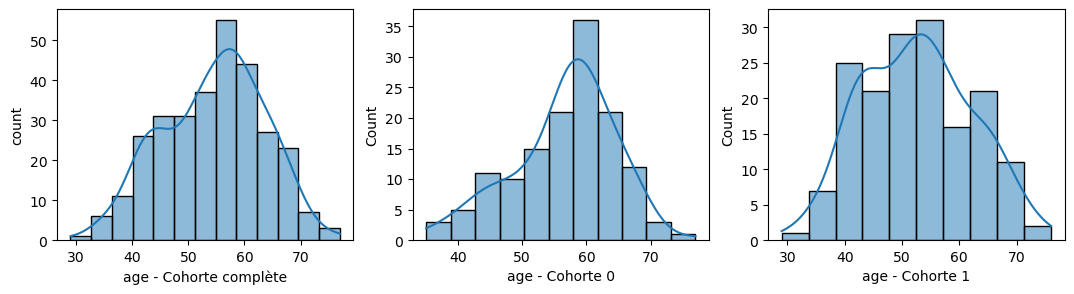

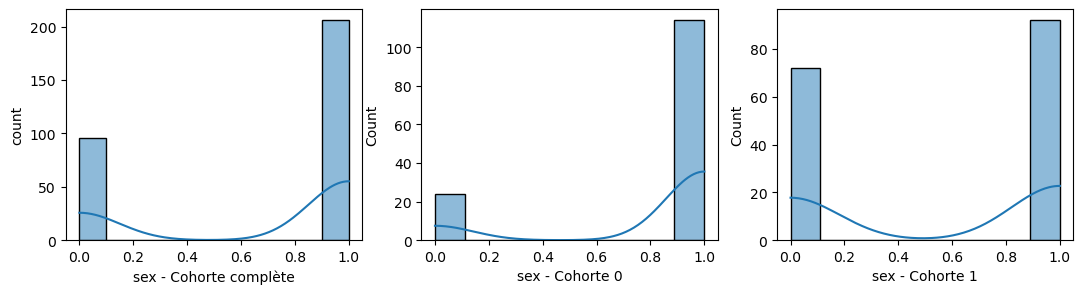

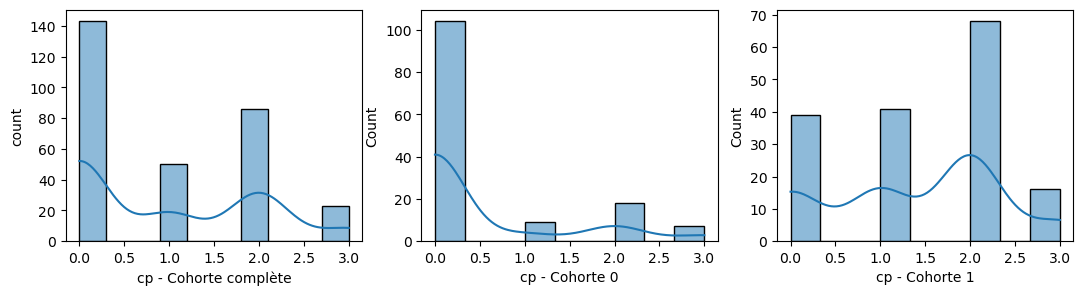

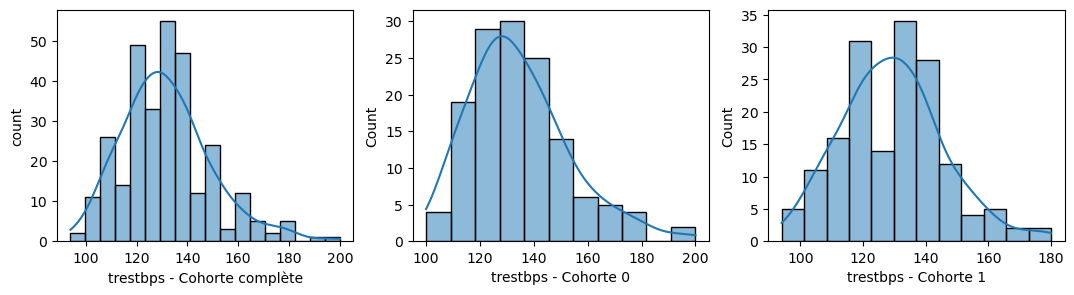

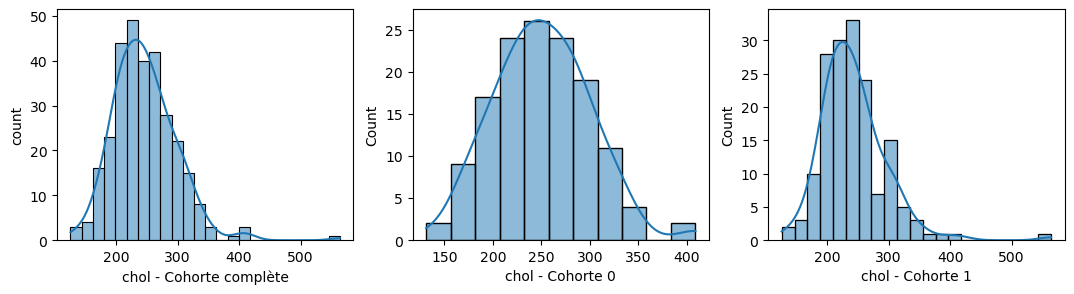

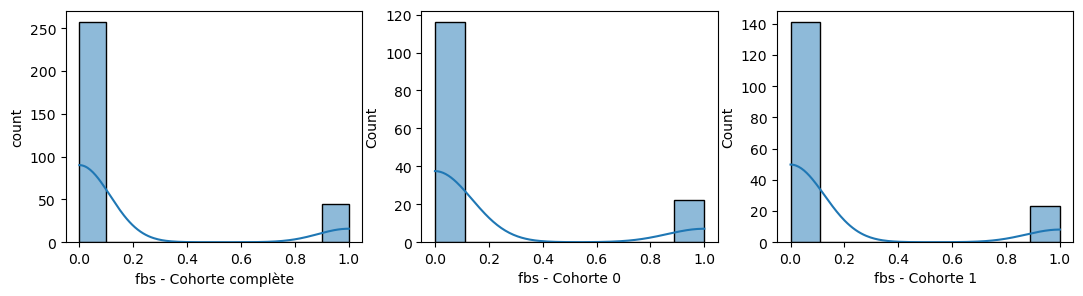

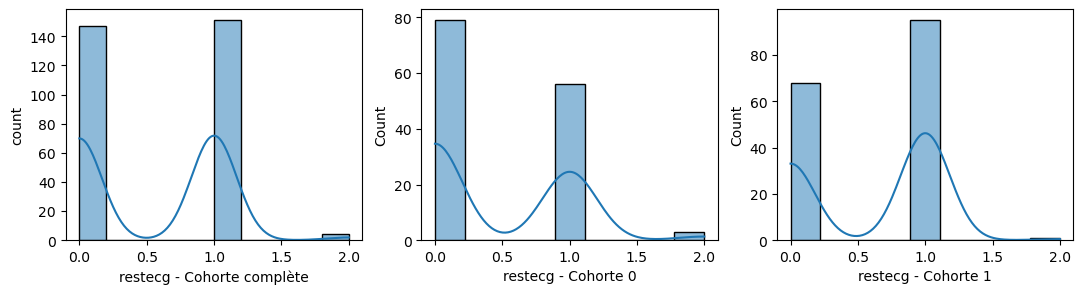

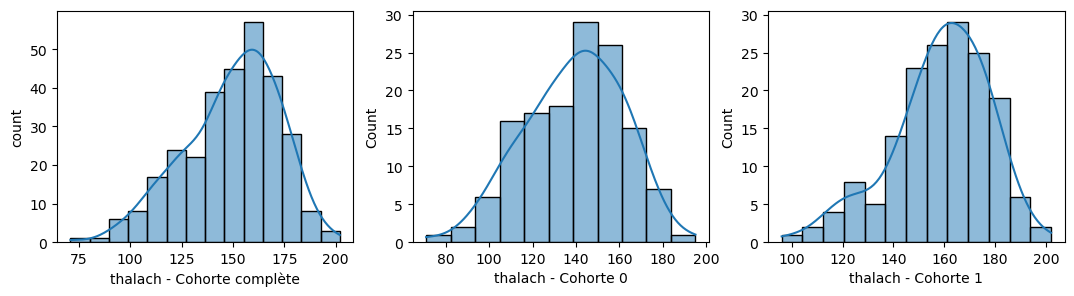

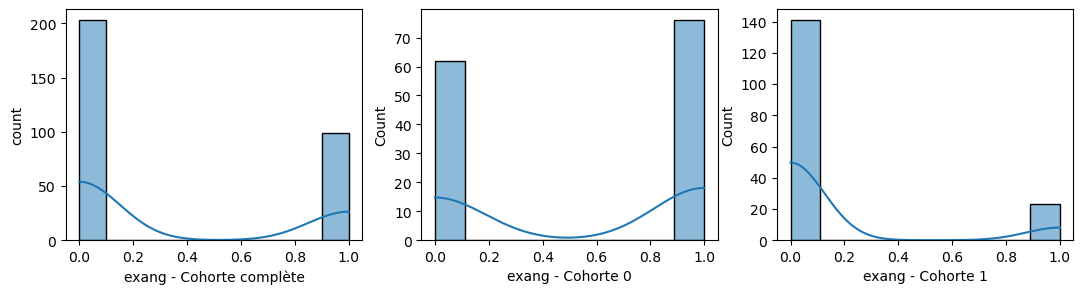

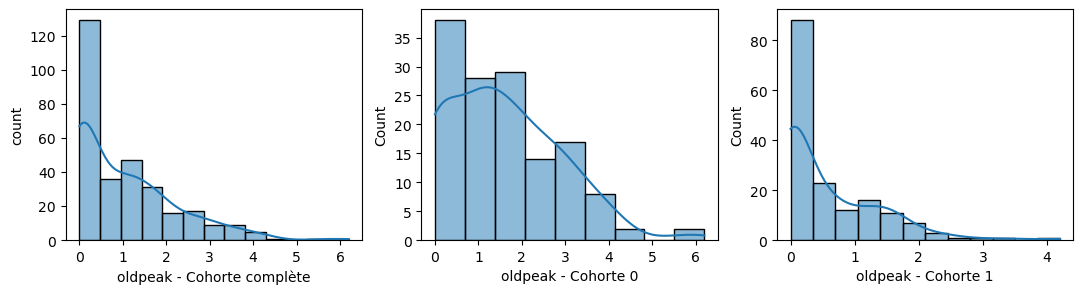

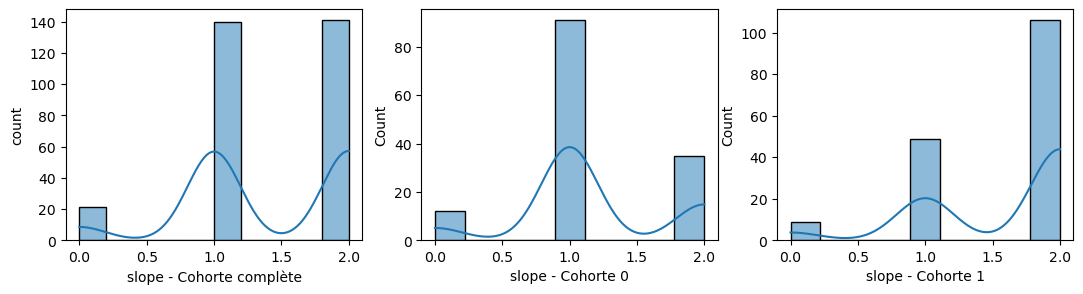

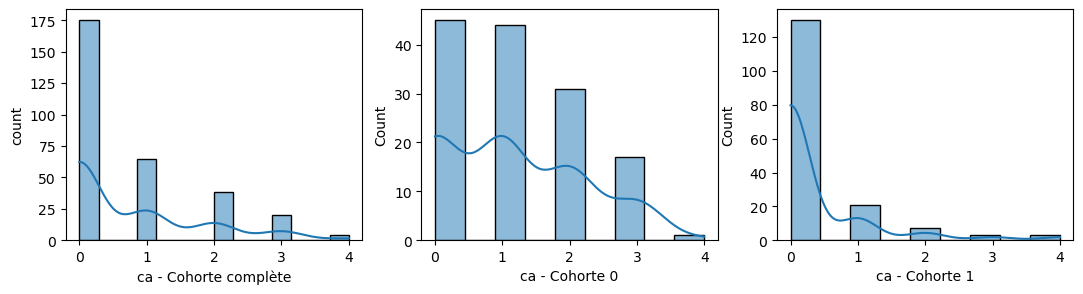

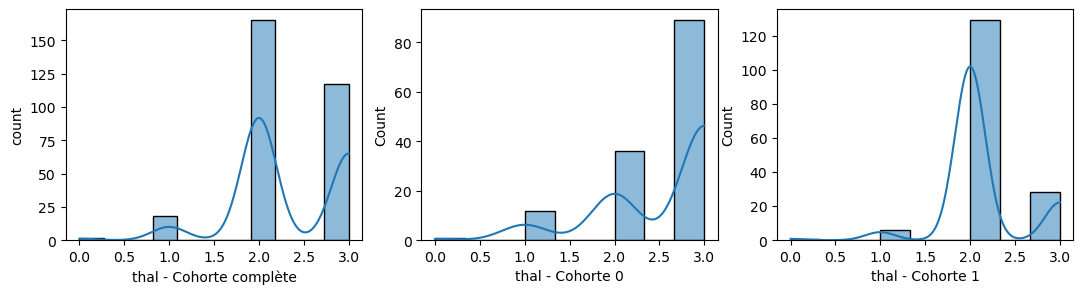

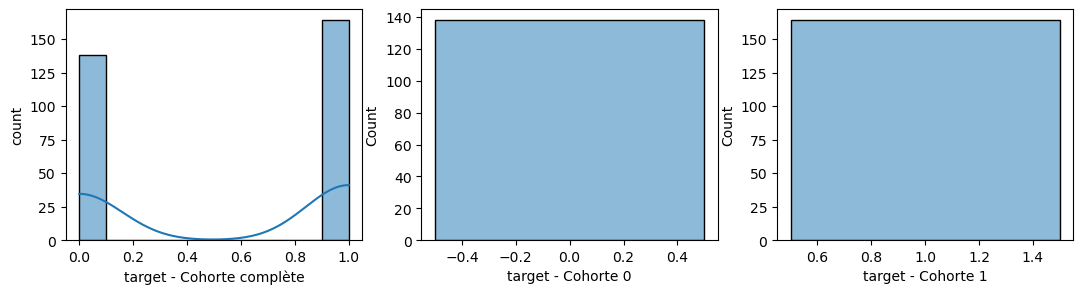

In [37]:
histo_numerical(df_heart_disease, "target", 0, 1)

### <a id='5.3'>5.3. Analyses multi variées

#### <a id='5.3.1'>5.3.1. Pairplots

In [38]:
def plot_pairplot_numeric(dataframe):
    # Sélectionner les colonnes numériques continues
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Filtrer les colonnes qui ne sont pas des colonnes catégorielles ou ordinales
    numeric_continuous_columns = [col for col in numeric_columns if dataframe[col].nunique() > 5] 

    # Créer une sous-DataFrame avec les colonnes numériques continues
    subdata_numeric = dataframe[numeric_continuous_columns]

    # Tracer le pairplot avec seaborn
    sns.pairplot(subdata_numeric)

    # Afficher le pairplot
    plt.show()

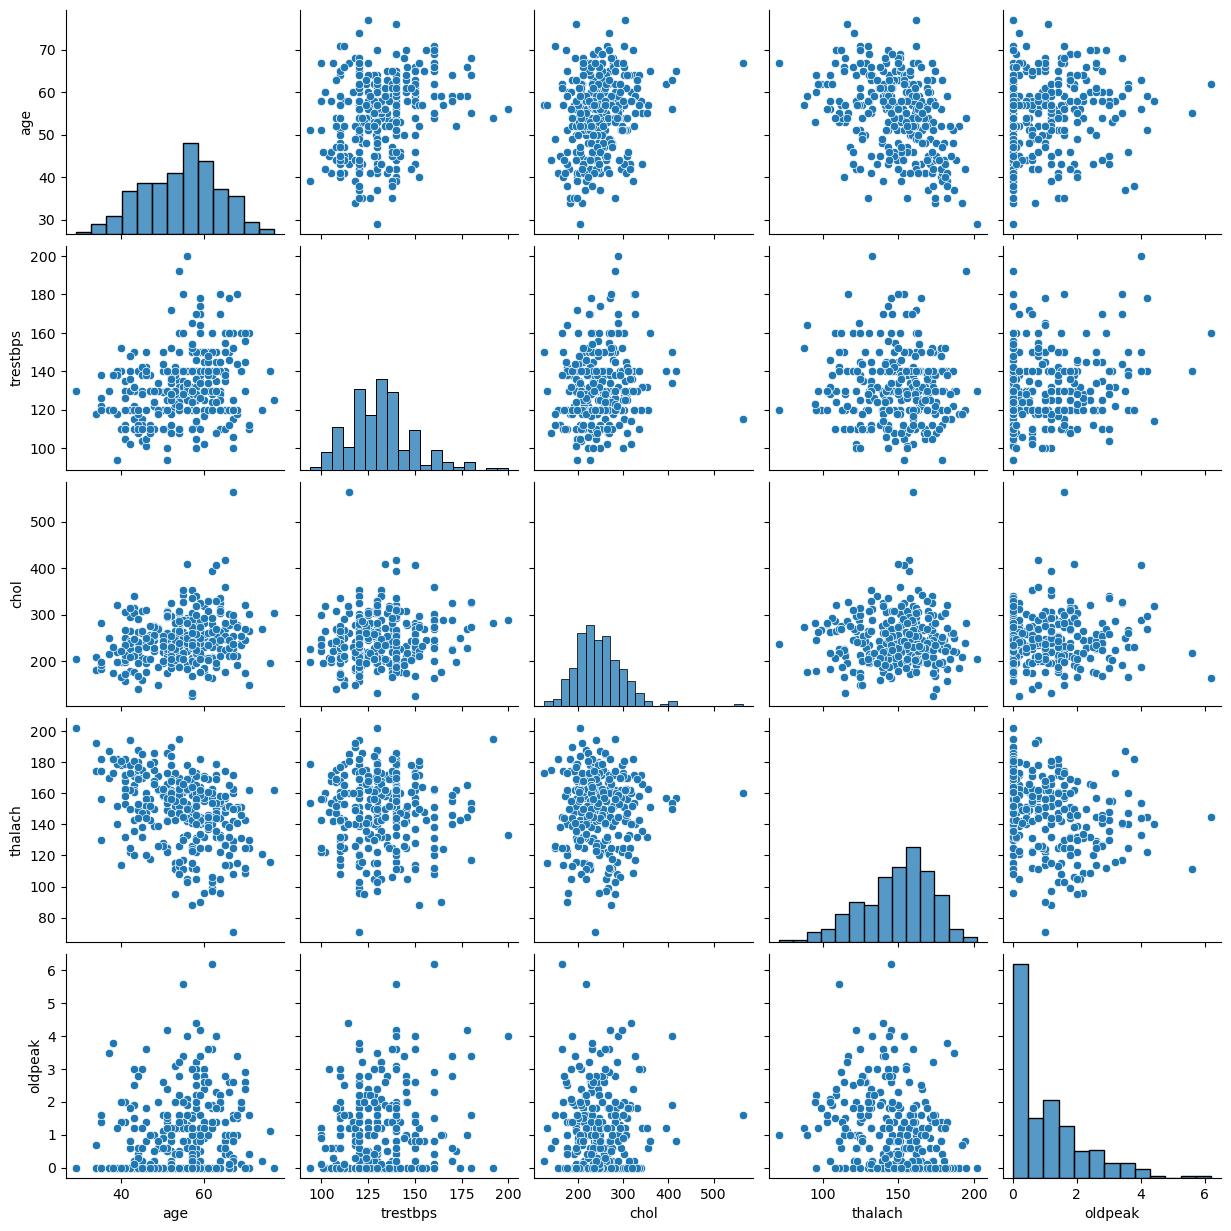

In [39]:
plot_pairplot_numeric(df_heart_disease)

#### <a id='5.3.2'>5.3.2. Heatmaps

In [40]:
def plot_triangle_corr_heatmap(dataframe):
    # Calculer la matrice de corrélation
    corr_matrix = dataframe.corr()

    # Créer un masque pour le triangle supérieur
    mask = np.triu(np.ones_like(corr_matrix))

    # Tracer la heatmap avec seaborn
    plt.figure(figsize=(20, 8))
    heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt='.2f')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

    # Afficher la heatmap
    plt.show()

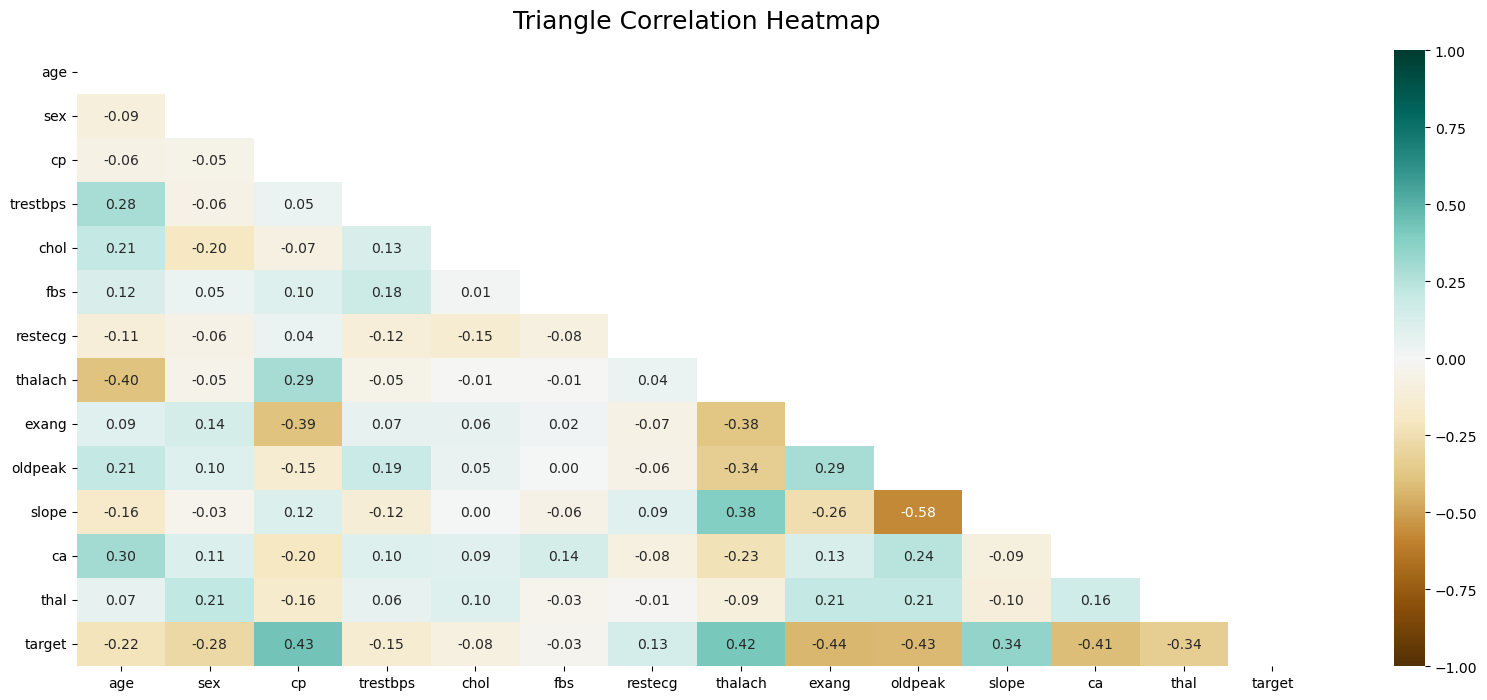

In [41]:
plot_triangle_corr_heatmap(df_heart_disease)

<a href='#0'> Retour à la table des matières </a> <br>

## <a id='6'>6. Conclusion de l'exploration des données<a>

Nous pouvons voir que les variables sont peu corrélées entre elles. En effet, la faible corrélation entre les variables peut être bénéfique pour plusieurs raisons.

Évitement de la redondance : Lorsque les variables sont fortement corrélées, elles apportent souvent des informations similaires au modèle. Cela peut conduire à une redondance dans les prédictions, ce qui n'ajoute pas nécessairement de la valeur et peut même introduire du bruit.

Réduction des biais : Des corrélations élevées entre les variables peuvent entraîner des biais dans le modèle, car il peut être difficile de discerner l'effet spécifique de chaque variable sur la variable cible. Une faible corrélation peut aider à isoler les effets individuels des variables indépendantes.

Interprétabilité accrue : Les modèles avec des variables faiblement corrélées peuvent souvent être plus faciles à interpréter, car il est plus simple d'attribuer des effets spécifiques à chaque variable sans qu'elles se chevauchent excessivement.

Stabilité des prédictions : Les modèles basés sur des variables faiblement corrélées peuvent être plus stables et généralisables à de nouvelles données, car ils ne sont pas aussi sensibles aux variations spécifiques dans une seule variable.

Nous pouvons observer une corrélation positive entre la douleur thoracique (cp) et la variable cible (notre target). Cela a du sens, car une plus grande intensité de douleur thoracique augmente les chances de maladie cardiaque. La douleur thoracique (cp) est une caractéristique ordinale avec 4 valeurs : Valeur 1 : angine typique, Valeur 2 : angine atypique, Valeur 3 : douleur non angineuse, Valeur 4 : asymptomatique.

De plus, nous constatons une corrélation négative entre l'angine induite par l'exercice (exang) et notre prédicteur. Cela a du sens, car lors de l'exercice, le cœur a besoin de plus de sang, mais des artères rétrécies ralentissent le flux sanguin.

In [42]:
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [43]:
df_heart_disease.to_csv(r"C:\Users\Wilders\Desktop\df_heart_diseases_final.csv", index=False)

<a href='#0'> Retour à la table des matières </a> <br>